# Magnitude and Phase from Real and Imaginary
## GUM Supplement 2, Section 9.3

This example recreates plots in GUM Supplement 2 demonstrating magnitude and phase from real and imaginary components.
The GUM steps through comparison of GUM and Monte-Carlo frameworks for several real/imaginary values with and without correlations.

In [1]:
import suncal

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 10

In [2]:
def plotit(report):
    ''' Helper function to get consistent plots for all cells. '''
    fig = plt.figure(figsize=(6,3.5))
    report.plot.joint_pdf(fig=fig, cmapmc='viridis')
    fig2 = plt.figure(figsize=(6,3.5))
    report.plot.pdf(fig=fig2, legend=False)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$mag$   | GUM          | 0.0010  | 0.010           | ± 0.020     | 1.960     | inf           |
|$mag$   | Monte Carlo  | 0.0126  | 0.0066           | (0.0023, 0.0272) | 1.902     | -             |
|$ph$   | GUM          | 0.0  | 10           | ± 20     | 1.960     | inf           |
|$ph$   | Monte Carlo  | -0.0028 | 1.7          | (-3.0, 3.0) | 1.700     | -             |

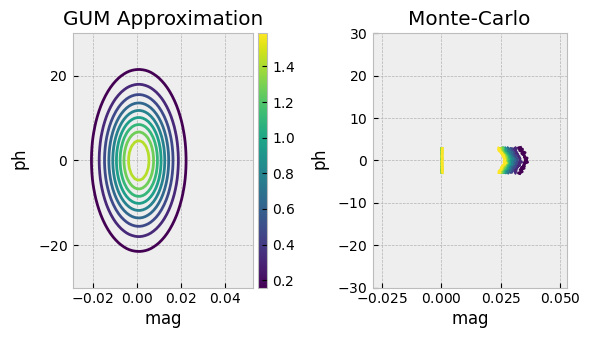

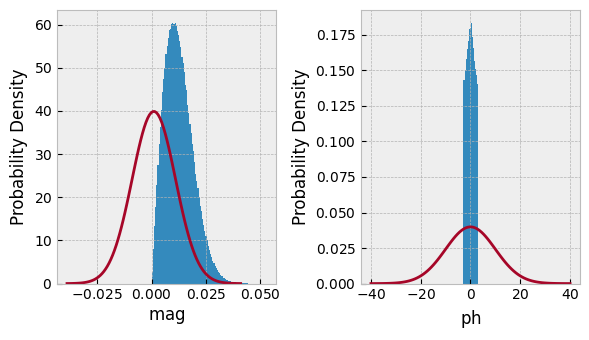

In [3]:
# Start with no correlation - GUM.S2 Figure 16
re = .001
im = 0

# NOTE: GUM used 1E7 samples. Running 1E6 here to save time.
u = suncal.Model('mag = sqrt(re**2 + im**2)', 'ph = atan2(im, re)')
u.var('re').measure(re).typeb(std=.01)
u.var('im').measure(im).typeb(std=.01)
report = u.calculate().report
display(report)
plotit(report)

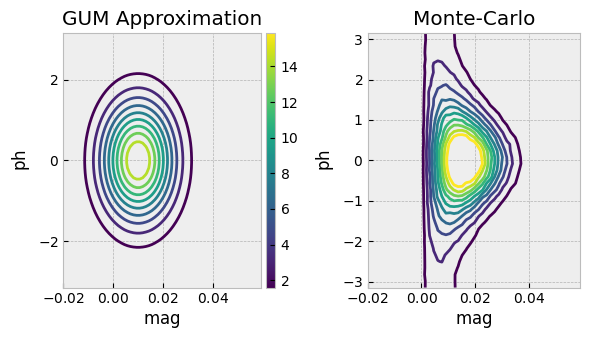

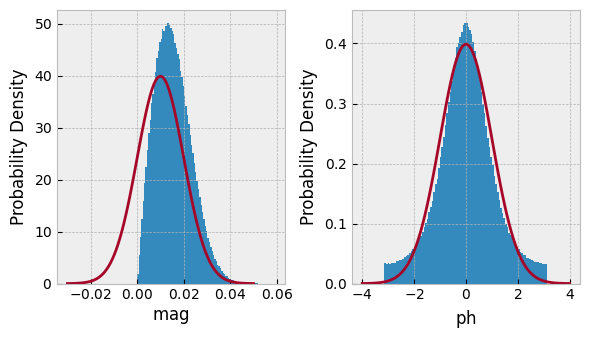

In [4]:
# re = .01 (Figure 17)
# Note: no need to redefine whole calculator, just change the input measured value and calculate().
u.var('re').measure(.01)
report = u.calculate().report
plotit(report)

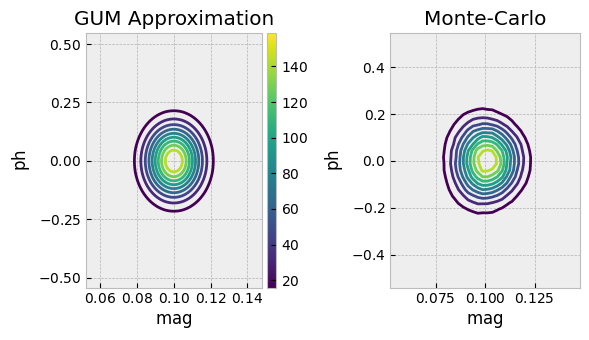

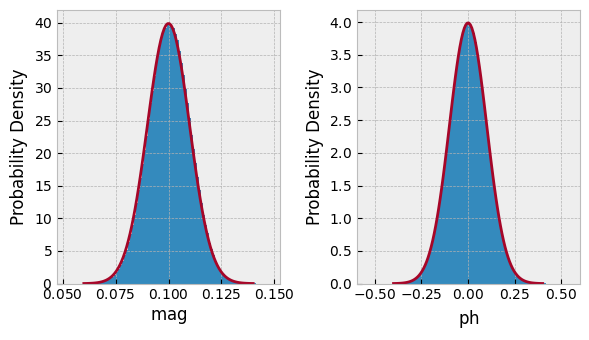

In [5]:
# re = .1 (Figure 18)
u.var('re').measure(.1)
report = u.calculate().report
plotit(report)

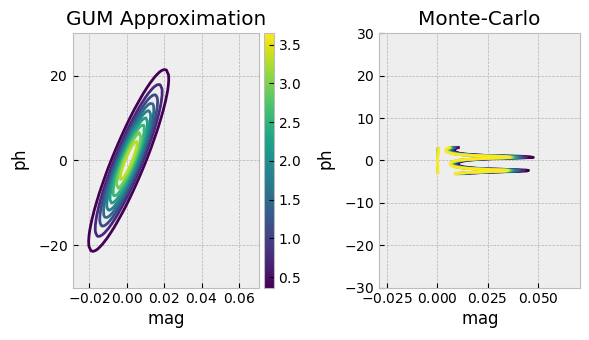

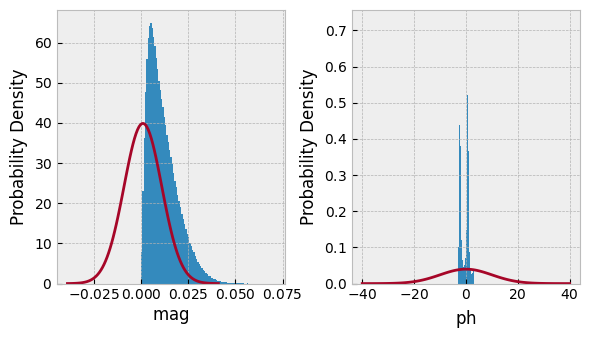

In [6]:
# Now correlate the real/imaginary components.
# re = .001
# correlation = 0.9  (Figure 19)

u.var('re').measure(.001)
u.variables.correlate('re', 'im', .9)
report = u.calculate().report
();
plotit(report)

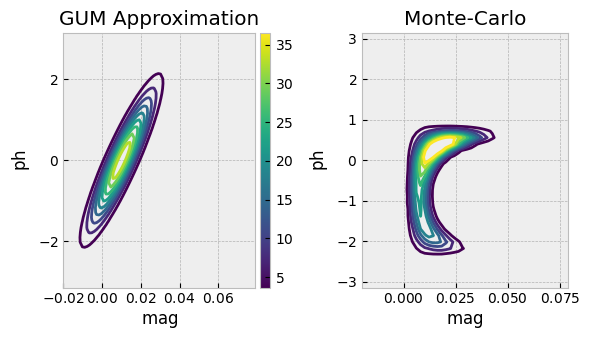

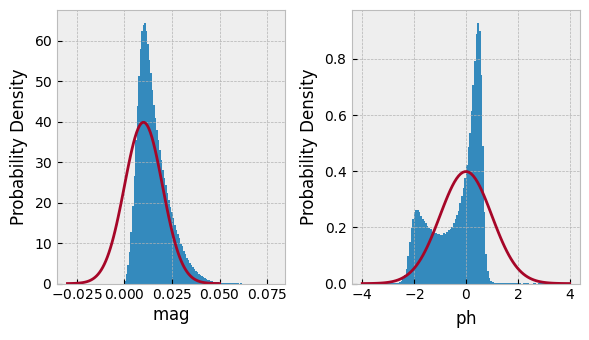

In [7]:
# re = .01
# correlation = 0.9  (Figure 20)

u.var('re').measure(.01)
u.variables.correlate('re', 'im', .9)
report = u.calculate().report
plotit(report)

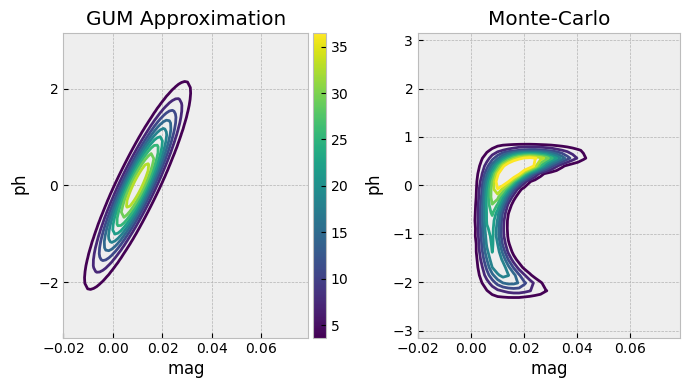

In [8]:
fig = plt.figure(figsize=(7,4))
report.plot.joint_pdf(fig=fig)

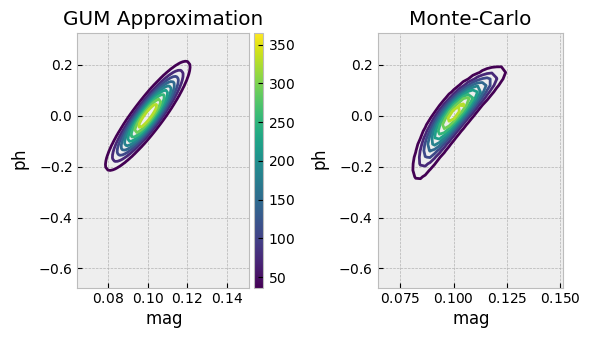

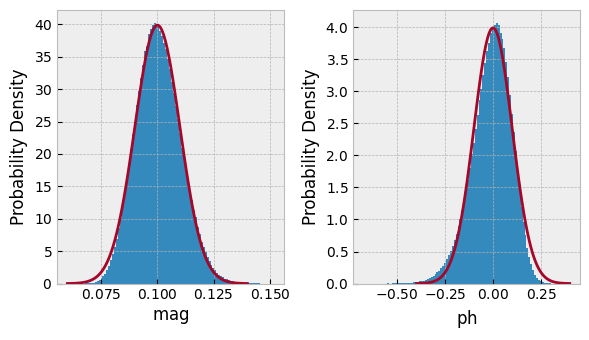

In [9]:
# re = .1
# correlation = 0.9  (Figure 21)

u.var('re').measure(.1)
u.variables.correlate('re', 'im', .9)
report = u.calculate().report
plotit(report)